In [2]:
#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from google.colab import files
data = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [4]:
df = pd.read_csv('Mall_Customers.csv')

In [5]:
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
import seaborn as sns # 
from sklearn.cluster import KMeans # loading k means algorithm 
import warnings
warnings.filterwarnings('ignore')

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

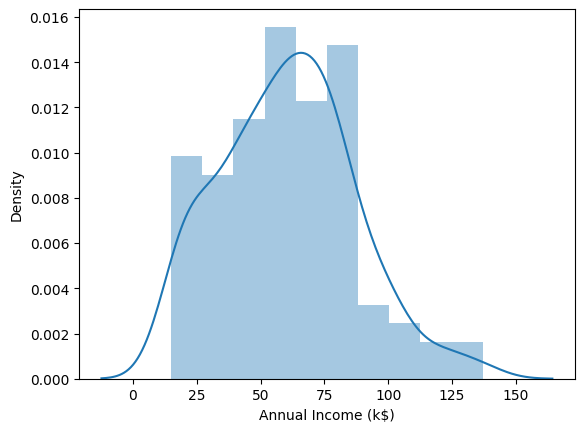

In [6]:
sns.distplot(df['Annual Income (k$)']) # distribution plots
# our data shape is normal distribution
df.columns

<Figure size 640x480 with 0 Axes>

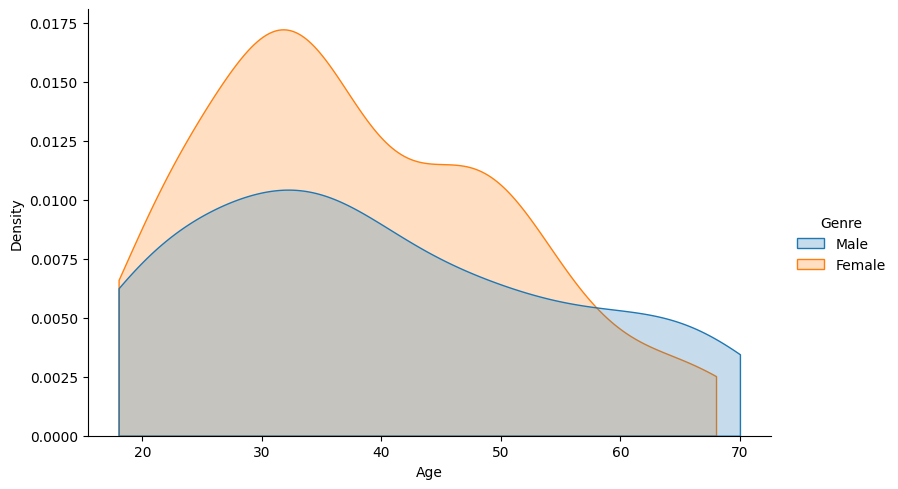

<Figure size 640x480 with 0 Axes>

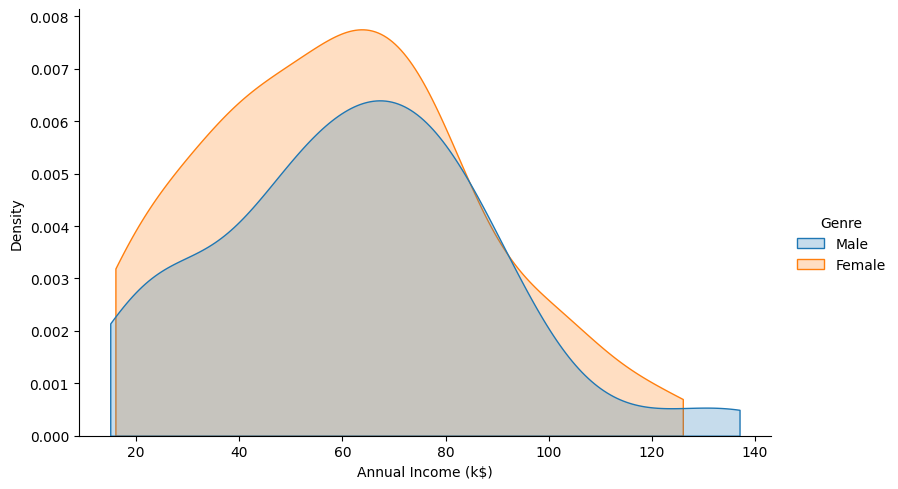

<Figure size 640x480 with 0 Axes>

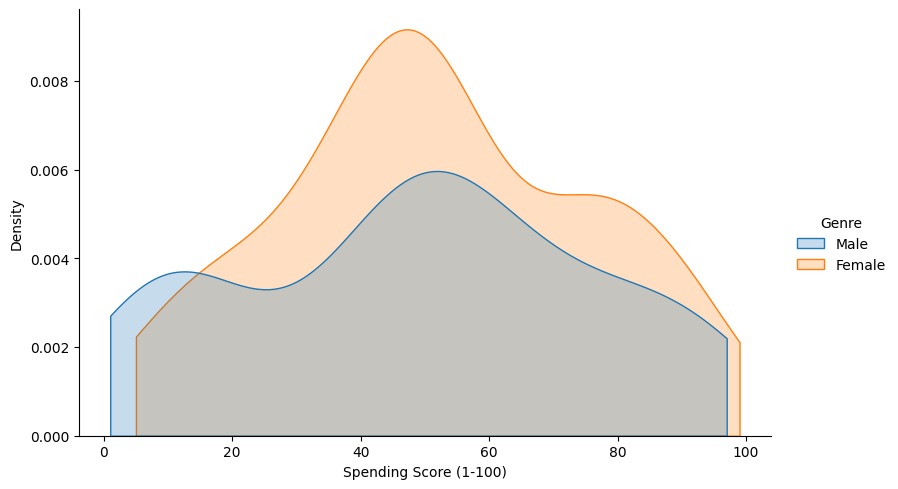

In [8]:
# we use a for loop to makes distribution of all the variables 
columns = [ 'Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.displot(data=df, hue='Genre', x= i,
            kind="kde", fill=True, height=5, aspect=1.6, 
            cut=0, bw_adjust=1)

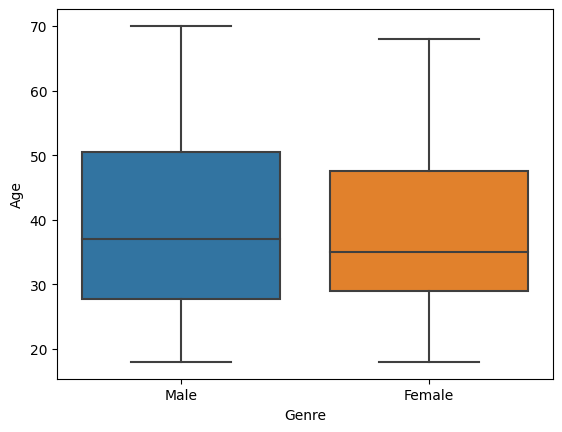

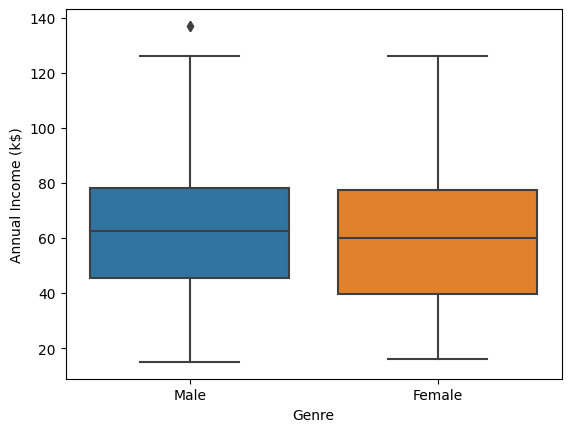

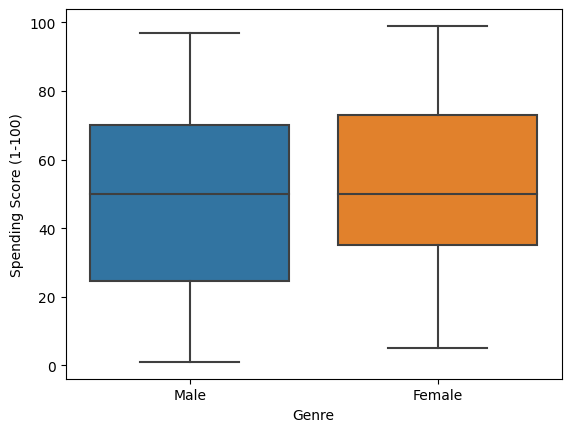

In [9]:
#lets use a box plot for more visualisations
columns = [ 'Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Genre', y = i)

In [11]:
df['Genre'].value_counts(normalize = True) # normalize to see percentages of gender in the data

Female    0.56
Male      0.44
Name: Genre, dtype: float64

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

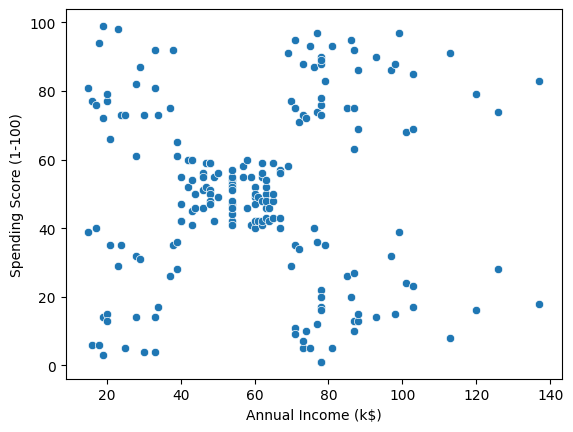

In [15]:
sns.scatterplot(data=df, x='Annual Income (k$)', y = 'Spending Score (1-100)')

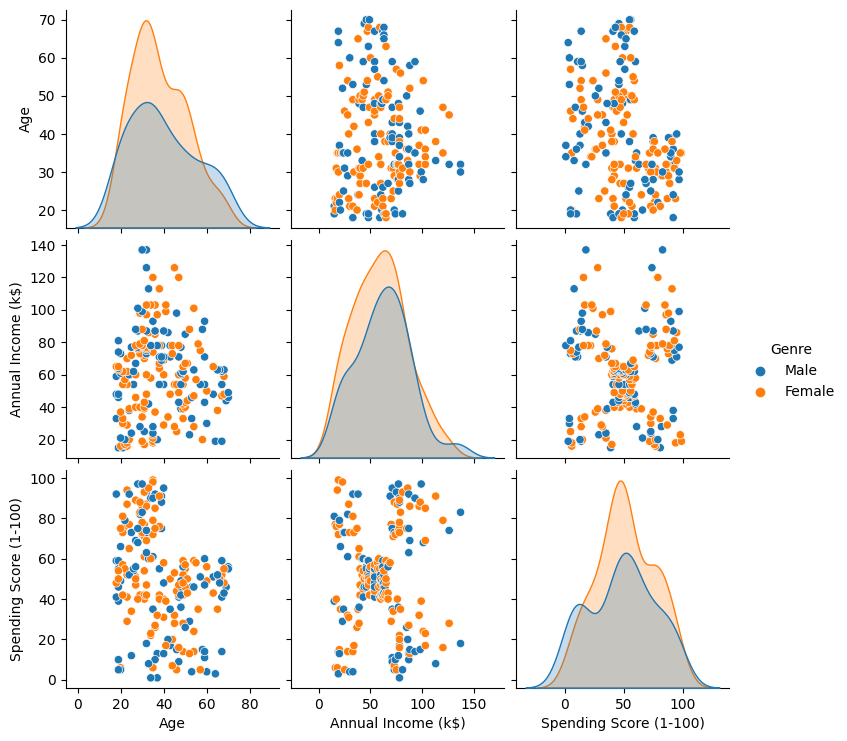

In [7]:
# use pair plots to see all the scatterplots and histograms
df1=df.drop('CustomerID', axis =1) # axis 1 dropping customer ID column level 
sns.pairplot(data=df1 , hue= 'Genre')

In [18]:
df1.groupby(['Genre']).mean()

,Age,Annual Income (k$),Spending Score (1-100)
Genre,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [19]:
# coorelation 
df1.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

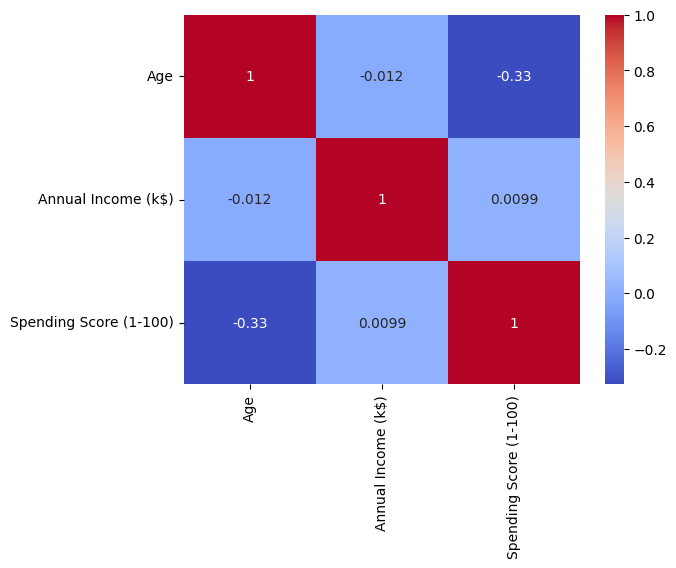

In [21]:
sns.heatmap(df1.corr(),annot= True, cmap='coolwarm')

Elbow Method for optimal value of k in KMeans

In [23]:
inertia_scores= []
for i in range(2,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df1[['Annual Income (k$)','Age','Spending Score (1-100)']])
    inertia_scores.append(kmeans.inertia_)

In [26]:
len(inertia_scores)

9

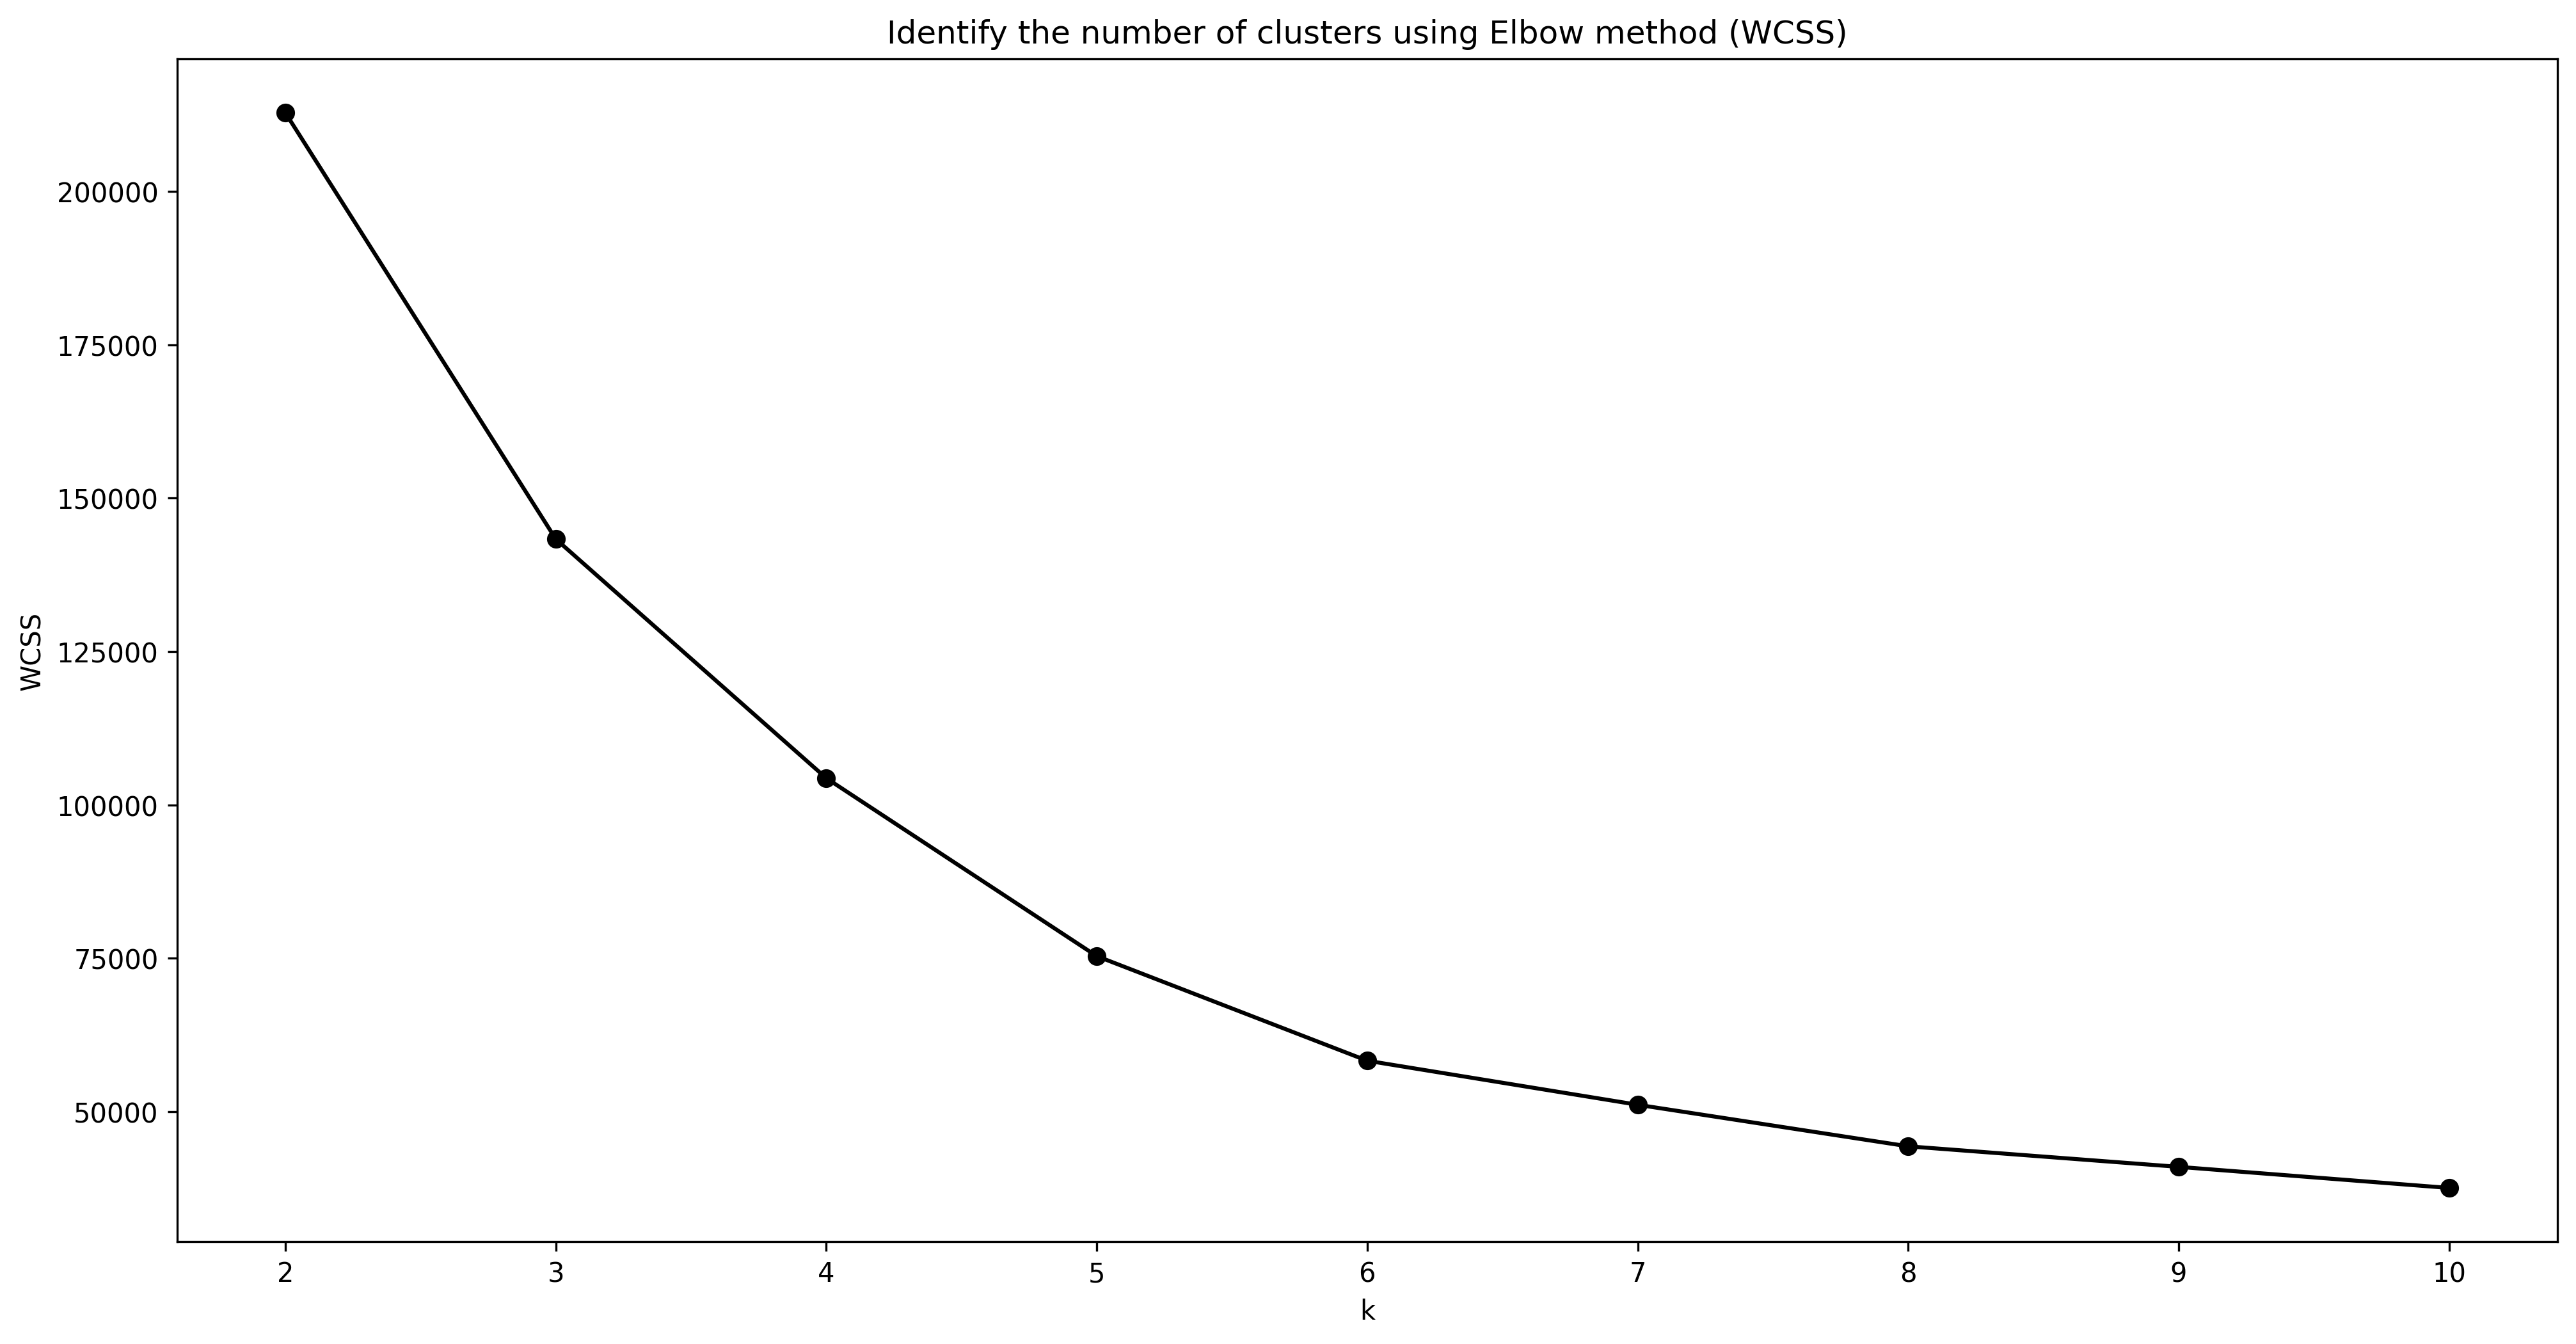

In [28]:
# Plot elbow graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(range(2,11), inertia_scores, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Identify the number of clusters using Elbow method (WCSS)')
plt.show()

In [29]:
#Elbow Method for optimal value of k in KMeans shows 4 or 5 clusters to be the optimal. 

In [8]:
clusterings = KMeans(n_clusters=4)
clusterings.fit(df1[['Annual Income (k$)','Age','Spending Score (1-100)']])

KMeans(n_clusters=4)

In [9]:
clusterings.labels_

array([0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [12]:
df1['clusters']= clusterings.labels_

In [13]:
df1['clusters'].value_counts()

2    95
3    39
1    38
0    28
Name: clusters, dtype: int64

In [10]:
df1.head(20)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


In [14]:
#cluster one is spending the highest. 
df1.groupby('clusters')['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
clusters,,,
0,24.821429,28.714286,74.250000
1,40.394737,87.000000,18.631579
2,44.894737,48.705263,42.631579
3,32.692308,86.538462,82.128205


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

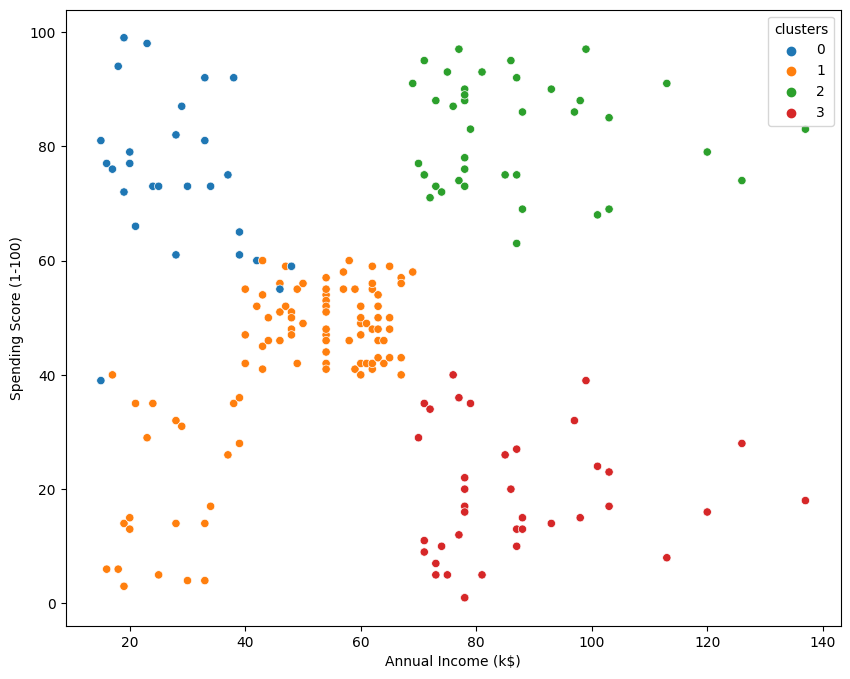

In [37]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df1, x='Annual Income (k$)', y ='Spending Score (1-100)', hue='clusters', palette='tab10')

In [ ]:
#create a 3d scatter plot. 

In [45]:
# Import libraries
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

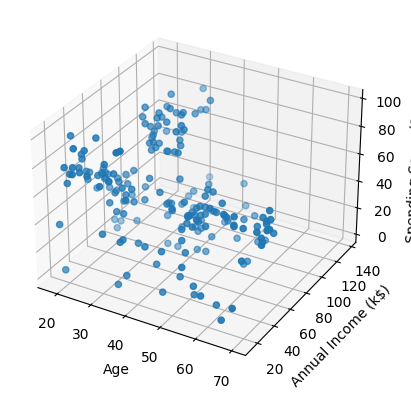

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df1['Age']
y = df1['Annual Income (k$)']
z = df1['Spending Score (1-100)']

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

ax.scatter(x, y, z)

plt.show()

In [38]:
clusterings.cluster_centers_

array([[28.71428571, 24.82142857, 74.25      ],
       [48.70526316, 44.89473684, 42.63157895],
       [86.53846154, 32.69230769, 82.12820513],
       [87.        , 40.39473684, 18.63157895]])

In [41]:
centers =pd.DataFrame(clusterings.cluster_centers_)
centers.columns = ['x','y','z']
centers

,x,y,z
0,28.714286,24.821429,74.250000
1,48.705263,44.894737,42.631579
2,86.538462,32.692308,82.128205
3,87.000000,40.394737,18.631579


In [52]:
pd.crosstab(df1['clusters'],df1['Genre'],normalize='index') 
# cluster 1 is spending the highest

Genre,Female,Male
clusters,,
0,0.500000,0.500000
1,0.621053,0.378947
2,0.538462,0.461538
3,0.473684,0.526316


In [ ]:
#what is the predict function does in k means? 

In [15]:
x = df1['Age']
y = df1['Annual Income (k$)']
z = df1['Spending Score (1-100)']
c = df1['clusters']

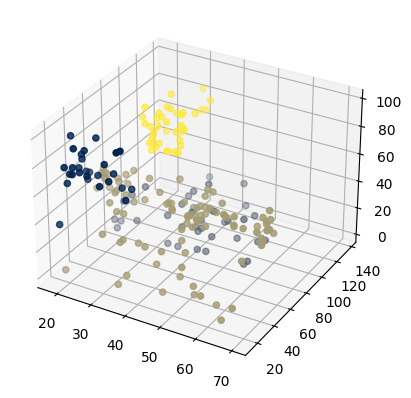

In [18]:
#3d dimensional plot with clusters by color. 
ax = plt.axes(projection='3d')
ax.scatter3D(x,y,z,c=c,cmap='cividis'); #try 'jet' cmap. 